In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_train=pd.read_csv("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/Projects/Projects for Submission/Project 2 - Income Qualification/train.csv")
data_test=pd.read_csv("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/Projects/Projects for Submission/Project 2 - Income Qualification/test.csv")
data_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
data_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


# Data Wrangling

In [4]:
print(data_train.shape)
print(data_test.shape)

(9557, 143)
(23856, 142)


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


# 1> Identify the output variable.
Observations are we don't have 'target' feature in test dataset. Test data has more rows than train dataset.
Output variable is "Target", which represents the poverty level on a 1-4 scale and is the label for the competition. A value of 1 is the most extreme poverty.

This is a supervised multi-class classification machine learning problem:

Supervised: provided with the labels for the training data
Multi-class classification: Labels are discrete values with 4 classes

# 2> Understand the type of data.

In [7]:
#List the columns for different datatypes:
print('Integer Type: ')
print(data_train.select_dtypes(np.int64).columns)
print('\n')
print('Float Type: ')
print(data_train.select_dtypes(np.float64).columns)
print('\n')
print('Object Type: ')
print(data_train.select_dtypes(np.object).columns)

Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: 
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [8]:
data_train.select_dtypes('int64').head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


In [9]:
int_null_values=data_train.select_dtypes('int64').head().isnull().sum()
int_null_values

hacdor            0
rooms             0
hacapo            0
v14a              0
refrig            0
                 ..
SQBhogar_total    0
SQBedjefe         0
SQBhogar_nin      0
agesq             0
Target            0
Length: 130, dtype: int64

In [10]:
data_train.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [12]:
float_null_values=data_train.select_dtypes('float64').isnull().sum()
float_null_values

v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

In [13]:
data_train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [14]:
object_null_values=data_train.select_dtypes('object').isnull().sum()
object_null_values

Id            0
idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64

No null values found in columns having integer and object data types.
We will have to handle null values found in columns having float data types.
Columns with object data types seem to be a mix of strings and numbers which we’ll need to address before doing any machine learning.

# Data Cleaning

Handling object data type columns with mixed values :-
According to documentation for these columns:
dependency:  Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of                                                                                          member of household between 19 and 64)
edjefe:  years of education of male head of household, based on the interaction of escolari (years of education), head of                                                                                            household and gender, yes=1 and no=0
edjefa:  years of education of female head of household, based on the interaction of escolari (years of education), head of                                                                                          household and gender, yes=1 and no=0

In [15]:
print(data_train['dependency'].unique())
print(data_train['edjefe'].unique())
print(data_train['edjefa'].unique())

['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


For these three variables, it seems “yes” = 1 and “no” = 0. We can correct the variables using a mapping and convert to floats.

In [16]:
mapping={'yes':1,'no':0}

for df in [data_train, data_test]:
    df['dependency'] =df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] =df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] =df['edjefa'].replace(mapping).astype(np.float64)
    
data_train[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


Lets fix the column with null values.

# 7> Count how many null values are existing in columns.
1> v2a1 (total nulls: 6860) : Monthly rent payment
2> v18q1 (total nulls: 7342) : number of tablets household owns
3> rez_esc (total nulls: 7928) : Years behind in school
4> meaneduc (total nulls: 5) : average years of education for adults (18+)
5> SQBmeaned (total nulls: 5) : square of the mean years of education of adults (>=18) in the household 142

1>  Lets look at few rows with nulls in v2a1
 But maybe they own their houses. We can look what type of housing these people with missing values live..
 Columns related to  Monthly rent payment are
 tipovivi1, =1 own and fully paid house
 tipovivi2, "=1 own,  paying in installments"
 tipovivi3, =1 rented
 tipovivi4, =1 precarious 
 tipovivi5, "=1 other(assigned,  borrowed)"

In [17]:
data = data_train[data_train['v2a1'].isnull()]
columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0
...,...,...,...,...,...
9542,1,0,0,0,0
9543,1,0,0,0,0
9544,1,0,0,0,0
9550,1,0,0,0,0


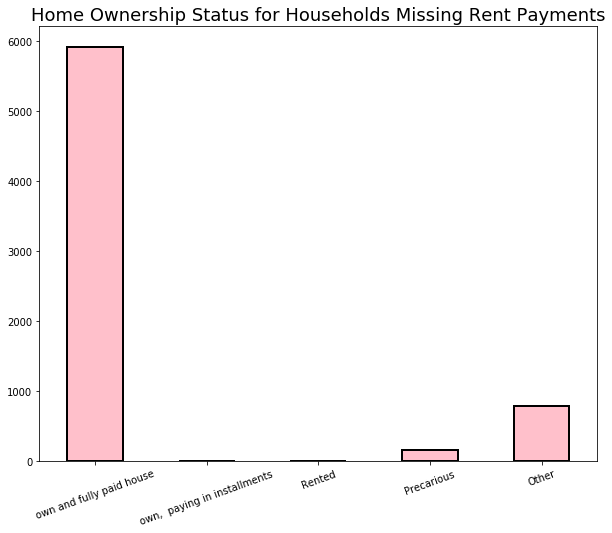

In [18]:
# Variables indicating home ownership
own_variables = [x for x in data_train if x.startswith('tipo')]

# Plot of the home ownership variables for home missing rent payments
data_train.loc[data_train['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'pink',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['own and fully paid house', 'own,  paying in installments', 'Rented', 'Precarious', 'Other'],
          rotation = 20)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

The majority in fact owns their houses, only a few have odd situations. We can probably just assume they don't pay rent, and put 0 in these cases.

In [19]:
for df in [data_train, data_test]:
    df['v2a1'].fillna(value=0, inplace=True)

data_train[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

2> Now, let's look at 'v18q1', which indicates how many tablets the household owns.
That are 7342 rows with missing values... However, there's a column, 'v18q', which indicates whether there's a tablet in the household at all, that might help.

In [20]:
data_train[data_train['v18q']==0]['Id'].count()

7342

In [21]:
data_train['v18q1'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.])

That's exactly the number of rows with missing values! There's also no 0 among the values of 'v18q1'. So all the nans in 'v18q1' just means they don't own a tablet! So we can just change them to 0.

In [22]:
for df in [data_train, data_test]:
    df['v18q1'].fillna(value=0, inplace=True)

data_train[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

3> Next up is 'rez_esc', which indicates if a person is behind in school. that are 7928 of rows with missing values, so I will explore more.

In [23]:
data_train['rez_esc'].describe()

count    1629.000000
mean        0.459791
std         0.946550
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: rez_esc, dtype: float64

In [24]:
data_train['rez_esc'].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

In [25]:
data_train[data_train['rez_esc']>1][['age', 'escolari', 'rez_esc']][:30]

,age,escolari,rez_esc
185,13,3,3.0
190,16,7,2.0
240,16,6,3.0
242,11,2,2.0
312,15,6,2.0
317,17,6,4.0
319,17,7,3.0
320,15,6,2.0
333,16,7,2.0
510,16,7,2.0


In [26]:
rez_esc_nan=data_train[data_train['rez_esc'].isnull()]
rez_esc_nan[(rez_esc_nan['age']<18) & rez_esc_nan['escolari']>0][['age', 'escolari']]

,age,escolari


So all the nans here are either adults or children before school age. We can input 0 again.

In [27]:
for df in [data_train, data_test]:
    df['rez_esc'].fillna(value=0, inplace=True)
data_train[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

4> Lets look at meaneduc   (total nulls: 5)
Columns related to average years of education for adults (18+)  
edjefe- years of education of male head of household, based on the interaction of escolari (years of education),head of household and gender, yes=1 and no=0
edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 
instlevel1, =1 no level of education
instlevel2, =1 incomplete primary 

In [28]:
data = data_train[data_train['meaneduc'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [29]:
#from the above, we find that meaneduc is null when no level of education is 0
#Lets fix the data
for df in [data_train, data_test]:
    df['meaneduc'].fillna(value=0, inplace=True)
data_train[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

5> Lets look at SQBmeaned  (total nulls: 5) : square of the mean years of education of adults (>=18) in the household.  
Columns related to average years of education for adults (18+) are:
edjefe- years of education of male head of household, based on the interaction of escolari (years of education),head of household and gender, yes=1 and no=0
edjefa- years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 
instlevel1, =1 no level of education
instlevel2, =1 incomplete primary 

In [30]:
data = data_train[data_train['SQBmeaned'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [31]:
#from the above, we find that SQBmeaned is null when no level of education is 0
#Lets fix the data
for df in [data_train, data_test]:
    df['SQBmeaned'].fillna(value=0, inplace=True)
data_train[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

In [32]:
#Lets look at the overall data
print(data_train.isnull().sum())
print(data_test.isnull().sum())

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 143, dtype: int64
Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBhogar_nin       0
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Length: 142, dtype: int64


# 3> Check if there are any biases in your dataset.

In [33]:
#Let's plot head of household and Target
# 1 = most extreme poverty 2 = moderate poverty 3 = vulnerable households 4 = non vulnerable households 
target_counts = data_train['Target'].value_counts().sort_index()
target_counts

1     755
2    1597
3    1209
4    5996
Name: Target, dtype: int64

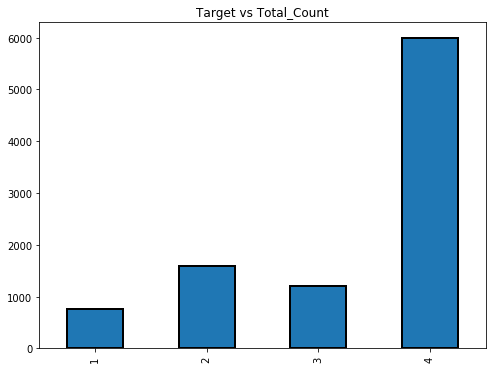

In [34]:
target_counts.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target vs Total_Count")

# 4> Check whether all members of the house have the same poverty level.


In [35]:
all_equal = data_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


# 5> Check if there is a house without a family head.

In [36]:
households_head = data_train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = data_train.loc[data_train['idhogar'].isin(households_head[households_head == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


# 6> Set poverty level of the members and the head of the house within a family.

In [37]:
# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(data_train[(data_train['idhogar'] == household) & (data_train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    data_train.loc[data_train['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = data_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


# 8> Remove null value rows of the target variable.

In [38]:
data_train.isnull().sum()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 143, dtype: int64

# Feature Selection

We will define different variables because we need to treat some of them in a different manner. 
There are several different categories of variables:

1> Individual Variables: these are characteristics of each individual rather than the household
    1.1> Boolean: Yes or No (0 or 1)
    1.2> Ordered Discrete: Integers with an ordering
2> Household variables
    2.1> Boolean: Yes or No
    2.2> Ordered Discrete: Integers with an ordering
    2.3> Continuous numeric
3> Squared Variables: derived from squaring variables in the data
4>Id variables: identifies the data and should not be used as features

In [39]:
# Id variables:
# we need these variables for identification
imp = ['Id', 'idhogar', 'Target']

In [40]:
# Squared variables: 
# We don't need these Squared Variables. These squared features are redundant. 
# ‘SQBescolari’,‘SQBage’,‘SQBhogar_total’,‘SQBedjefe’,‘SQBhogar_nin’,‘SQBovercrowding’,‘SQBdependency’,‘SQBmeaned’,‘agesq’.
print(data_train.shape)
cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']


for df in [data_train, data_test]:
    df.drop(columns = cols,inplace=True)

print(data_train.shape)

(9557, 143)
(9557, 134)


In [42]:
# Household variables:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4',
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

#Check for redundant household variables
heads = data_train.loc[data_train['parentesco1'] == 1, :]
heads = heads[imp + hh_bool + hh_cont + hh_ordered]
heads.shape

(2973, 98)

In [43]:
#Let’s take a look at the correlations between all of the household variables. If there are any that are too highly 
# correlated, then we might want to remove one of the pair of highly correlated variables.

# Create correlation matrix
corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(to_drop)

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']


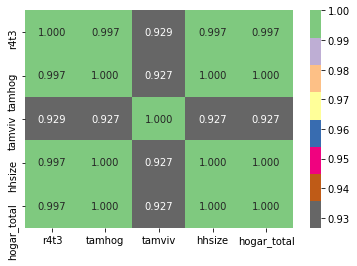

In [44]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamviv'].abs() > 0.9, corr_matrix['tamviv'].abs() > 0.9],
            annot=True, cmap = plt.cm.Accent_r, fmt='.3f');

In [45]:
# There are several variables here having to do with the size of the house:
# r4t3, Total persons in the household
# tamhog, size of the household
# tamviv, number of persons living in the household
# hhsize, household size
# hogar_total, # of total individuals in the household
# These variables are all highly correlated with one another.
cols=['tamhog', 'hogar_total', 'r4t3']
for df in [data_train, data_test]:
    df.drop(columns = cols,inplace=True)

data_train.shape

(9557, 131)

In [46]:
# Individual Variables:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

#Check for redundant Individual variables
ind = data_train[imp + ind_bool + ind_ordered]
ind.shape

(9557, 39)

In [47]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [48]:
# This is simply the opposite of male! We can remove the male flag.
for df in [data_train, data_test]:
    df.drop(columns = 'male',inplace=True)

data_train.shape

(9557, 130)

In [49]:
#lets check area1 and area2 also
# area1, =1 zona urbana 
# area2, =2 zona rural 
#area2 redundant because we have a column indicating if the house is in a urban zone

for df in [data_train, data_test]:
    df.drop(columns = 'area2',inplace=True)

data_train.shape

(9557, 129)

In [50]:
#Finally lets delete 'Id', 'idhogar'
cols=['Id','idhogar']
for df in [data_train, data_test]:
    df.drop(columns = cols,inplace=True)

data_train.shape

(9557, 127)

# 9> Predict the accuracy using random forest classifier.

In [121]:
x_features=data_train.iloc[:,0:-1]
y_features=data_train.iloc[:,-1]
print(x_features.shape)
print(y_features.shape)

(9557, 126)
(9557,)


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

x_train,x_test,y_train,y_test=train_test_split(x_features,y_features,test_size=0.2,random_state=1)
rmclassifier = RandomForestClassifier()

rmclassifier.fit(x_train,y_train)
print(rmclassifier.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [123]:
y_predict = rmclassifier.predict(x_test)

print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9435146443514645
[[ 132    1    0   24]
 [   1  284    1   31]
 [   0    1  185   47]
 [   0    1    1 1203]]
              precision    recall  f1-score   support

           1       0.99      0.84      0.91       157
           2       0.99      0.90      0.94       317
           3       0.99      0.79      0.88       233
           4       0.92      1.00      0.96      1205

    accuracy                           0.94      1912
   macro avg       0.97      0.88      0.92      1912
weighted avg       0.95      0.94      0.94      1912



In [124]:
y_predict_testdata = rmclassifier.predict(data_test)
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

# 10> Check the accuracy using random forest with cross validation.

In [126]:
from sklearn.model_selection import KFold,cross_val_score
# Checking the score using default 10 trees
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

rmclassifier=RandomForestClassifier(n_estimators=10,random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.93514644 0.93043933 0.92569335 0.9314495  0.9314495 ]
93.08356268159017


In [127]:
num_trees= 100

rmclassifier=RandomForestClassifier(n_estimators=100, random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.94246862 0.94979079 0.94557823 0.94243851 0.94976452]
94.60081361157272


In [129]:
rmclassifier.fit(x_train,y_train)
print(rmclassifier.get_params())

y_predict_testdata = rmclassifier.predict(data_test)
y_predict_testdata

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}


array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

Looking at the accuracy score, RandomForestClassifier with cross validation has the highest accuracy score of 94.60%

To get a better sense of what is going on inside the RandomForestClassifier model, lets visualize how our model uses the different features and which features have greater effect.

In [130]:
rmclassifier.fit(x_features,y_features)
labels = list(x_features)
feature_importances = pd.DataFrame({'feature': labels, 'importance': rmclassifier.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()

,feature,importance
0,v2a1,0.018653
2,rooms,0.025719
9,r4h2,0.020706
10,r4h3,0.019808
11,r4m1,0.015271


Text(0.5, 0, 'Importance')

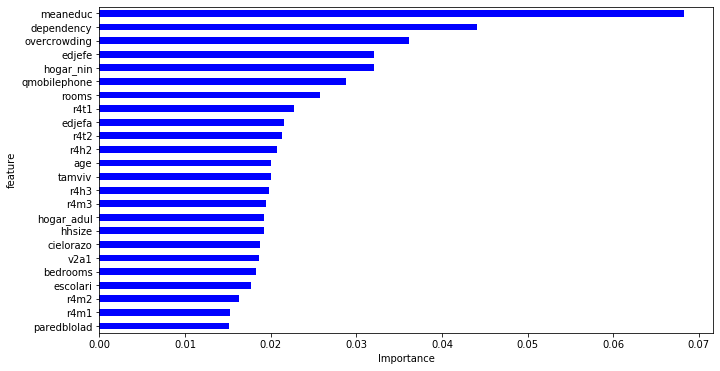

In [131]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(11, 6),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the above figure, meaneduc,dependency,overcrowding has significant influence on the model.